In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
# 如果mnist要玩卷積
# x_train.reshape(-1,28,28,1) (28,28) != (28,28,1)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
import numpy as np
a = np.array([
              [2,5,9],
              [8,5,6],
              [4,2,1]
])
a.shape

(3, 3)

In [5]:
print(y_train)
# 答案為二維 => 圖內有可能有兩個答案以上(sigmoid),以後要擴充

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [0]:
trans = ["airplain", "car", "bird", "cat", "deer", "dog", "frog", "horse", "boot", "truck"]

ans: car


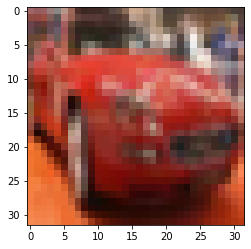

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 5
print("ans:", trans[y_train[idx][0]]) # 答案要多開一層
plt.imshow(x_train[idx])
# x_train[0]

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
# strides=(2,2) 步長, size % strides = 0 (4, 4)
# keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid')
model = Sequential()
# (一個過濾器) 3 * 3 * 3 * (filter數目) 64 + (bias)64 = 1792
model.add(Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D())
# (一個過濾器) 3 * 3 * 64 * (filter數目) 128 + (bias)128 = 73856
model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())
# (一個過濾器) 3 * 3 * 128 * (filter數目) 256 + (bias)128 = 295168
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
# 用SparseCategoricalCrossentropy不用 one-hot encoding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])

In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [11]:
## batch_size: 問多少筆資料進行一次梯度下降(平均)
# epochs: 整份資料要看幾遍
# validation_split: train_test_split驗證模型到底好不好
# verbose: log level(0:沒有 1:最多 2:適中)
# 270: 54000(train) / 200
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
stop_callback = EarlyStopping(patience=3, restore_best_weights=True)
save_callback = ModelCheckpoint("fashion.h5", save_best_only=True)
model.fit(x_train_norm, 
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          callbacks=[stop_callback, save_callback],
          verbose=2)

Epoch 1/100
225/225 - 3s - loss: 1.6987 - accuracy: 0.3770 - val_loss: 1.2900 - val_accuracy: 0.5418
Epoch 2/100
225/225 - 3s - loss: 1.2504 - accuracy: 0.5556 - val_loss: 1.0917 - val_accuracy: 0.6186
Epoch 3/100
225/225 - 2s - loss: 1.0420 - accuracy: 0.6322 - val_loss: 0.8846 - val_accuracy: 0.6904
Epoch 4/100
225/225 - 3s - loss: 0.9207 - accuracy: 0.6793 - val_loss: 0.8270 - val_accuracy: 0.7176
Epoch 5/100
225/225 - 3s - loss: 0.8293 - accuracy: 0.7130 - val_loss: 0.7693 - val_accuracy: 0.7362
Epoch 6/100
225/225 - 3s - loss: 0.7381 - accuracy: 0.7435 - val_loss: 0.7336 - val_accuracy: 0.7442
Epoch 7/100
225/225 - 3s - loss: 0.6673 - accuracy: 0.7672 - val_loss: 0.7067 - val_accuracy: 0.7560
Epoch 8/100
225/225 - 3s - loss: 0.6094 - accuracy: 0.7874 - val_loss: 0.6836 - val_accuracy: 0.7678
Epoch 9/100
225/225 - 3s - loss: 0.5395 - accuracy: 0.8108 - val_loss: 0.6747 - val_accuracy: 0.7768
Epoch 10/100
225/225 - 2s - loss: 0.4948 - accuracy: 0.8248 - val_loss: 0.7189 - val_accura

In [12]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7246 - accuracy: 0.7583


[0.7245511412620544, 0.7583000063896179]

In [13]:

# predict: 機率 predict_classes: 類別
pre = model.predict_classes(x_test_norm)
print(pre.shape)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
(10000,)


array([3, 8, 8, ..., 5, 4, 7])

In [14]:
print(y_test.shape)
y_test_1d = y_test.reshape(-1)
print(y_test_1d.shape)
print(y_test_1d)

(10000, 1)
(10000,)
[3 8 8 ... 5 1 7]


In [15]:
import numpy as np
# [:200]: 太多錯, 我只取前兩百個
idx = np.nonzero(pre != y_test_1d)[0][:200]
false_pre_img = x_test[idx]
false_pre_label = y_test_1d[idx]
false_pre_predict = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_pre_img):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(trans[false_pre_predict[i]],
                                trans[false_pre_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

檔名:b1.jpg
正確答案應該是: bird


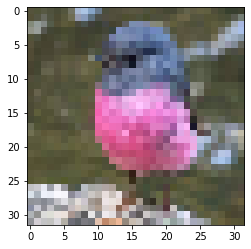

In [18]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名:")
img_raw = load_img(f, target_size=(32, 32))
img = np.array(img_raw).reshape(1, 32, 32, 3) / 255
answer = model.predict_classes(img)[0]
print("正確答案應該是:", trans[answer])
plt.imshow(img_raw)